In [32]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

data = pd.read_csv('./Hitters.csv')
data.head()

data.isnull().sum()

print(len(data)) # displaying the nr of rows
data = data[data['Salary'].notna()] # removing the rows with nan vales
print(len(data))

# Performing one hot encoding 
league_columns = pd.get_dummies(data['League'])
league_columns


322
263


,A,N
1,False,True
2,True,False
3,False,True
4,False,True
5,True,False
...,...,...
317,False,True
318,True,False
319,True,False
320,True,False


##### One hot encoding 

In [33]:
# Performing one hot encoding 
league_columns = pd.get_dummies(data['League'], prefix='League', dtype=int)
league_columns

,League_A,League_N
1,0,1
2,1,0
3,0,1
4,0,1
5,1,0
...,...,...
317,0,1
318,1,0
319,1,0
320,1,0


#### 1. How to Approach Features: Drop or Engineer
💡 What it means:
A "feature" is a column in your dataset. You decide:
- Which features to keep
- Which to drop
- Which new ones to create (engineer)

🎯 Why it matters:
Better features = better model performance.

🔧 When to drop a feature:
- It has too many missing values
- It’s irrelevant (e.g., ID number)
- It’s leaking future info (e.g., test score used to predict test score)
- It’s highly correlated with another column (multicollinearity)

✨ When to engineer a feature:
- Combine two columns into one (e.g., BMI = weight / height²)
- Extract parts (e.g., year from a date, title from a name)
- Group or bin values (e.g., age groups)



#### ✅ 2. Handle Missing Values (NaN-values)
💡 What it means:
Missing values (NaN) are empty entries in your dataset.

🎯 Why it matters:
Most ML models cannot work with missing values directly.

🔧 How to handle:
- Drop rows/columns:

- Fill with a value:
    - Median for numeric:
    - Mode for categorical:

🔑 Choose based on the distribution of data and how important the column is.

In [34]:
# Drop rows
data.dropna(subset=['Salary'], inplace=True) #inplace its used to perform all the changes in the same dataset without copy a new one
data = data.drop(['Salary'],axis=1) # for deleting the colum

data['CHits'].fillna(data['CHits'].median(),inplace=True) # Fill me missing value with median 
data['Division'].fillna(data['Division'].mode()[0], inplace=True)


C:\Users\emanu\AppData\Local\Temp\ipykernel_14084\3746678384.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['CHits'].fillna(data['CHits'].median(),inplace=True) # Fill me missing value with median
C:\Users\emanu\AppData\Local\Temp\ipykernel_14084\3746678384.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are sett

#### ✅ 3. Identify and Handle Outliers (Boxplot)

In [35]:
dataframe = pd.read_csv('./Hitters.csv').dropna()
dataframe[['Salary']].boxplot(vert=False)

<Axes: >

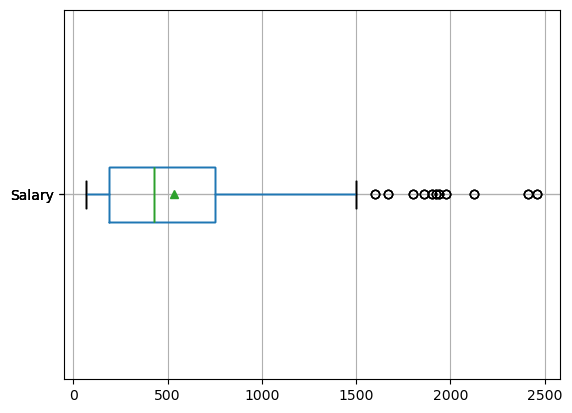

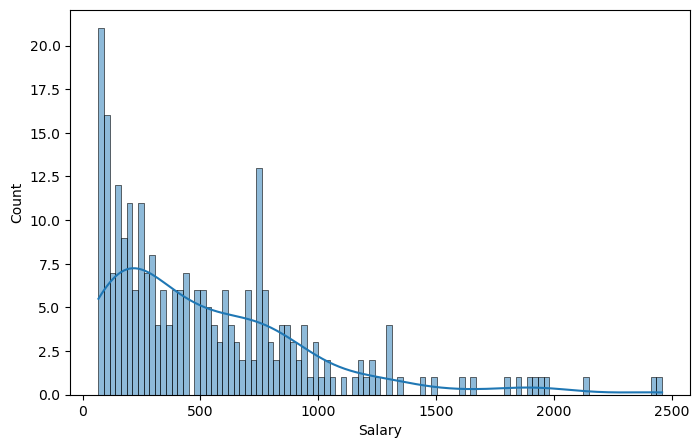

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

salary = dataframe['Salary']
plt.figure(figsize=(8,5))
sns.histplot(salary, bins=100,kde=True)
plt.show()


#### How to Hendle outliers:
- Remove outliers
- Apply transormation

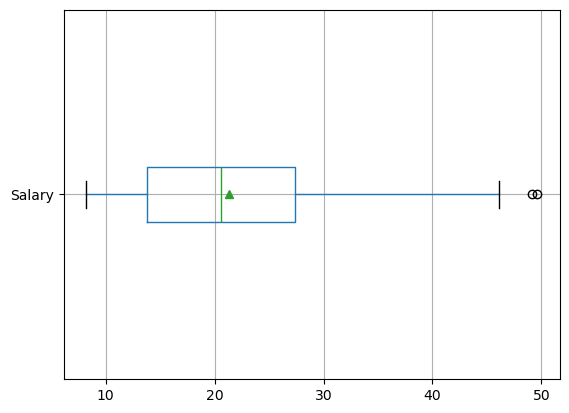

In [45]:
# Apply Transformation

dataframe[['Salary']].apply(np.sqrt).boxplot(vert=False, showmeans=True)
plt.show()

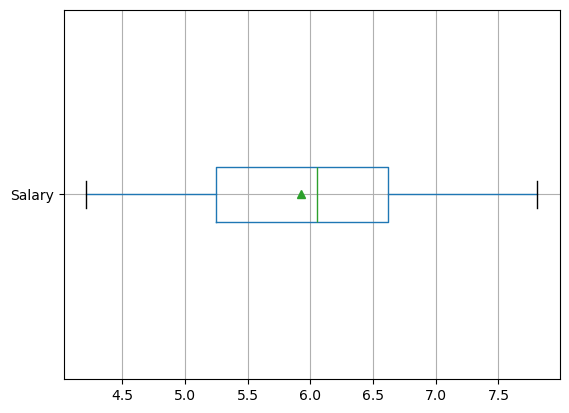

In [46]:
dataframe[['Salary']].apply(np.log).boxplot(vert=False, showmeans=True)
plt.show()

In [2]:
from sklearn.preprocessing import StandardScaler

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train KNN on scaled data
model_scaled = KNeighborsClassifier(n_neighbors=5)
model_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = model_scaled.predict(X_test_scaled)

print("Accuracy with scaling:", accuracy_score(y_test, y_pred_scaled))

Accuracy with scaling: 1.0
